In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# NLP

import string, re,nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords


from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

#Train_test split

from sklearn.model_selection import train_test_split, ParameterGrid

# Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
# Importing Dataset
data = pd.read_csv('/content/drive/MyDrive/data/dark_patterns.csv')
data.head()

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/


In [ ]:
data.head()


,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/


In [ ]:
data.value_counts()


Pattern String                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Comment                    Pattern Category  Pattern Type           Where in website?  Deceptive?  Website Page                                                                                              
Only 5 left in stock                                                   

In [ ]:
data.isna().sum()


Pattern String       306
Comment               20
Pattern Category       0
Pattern Type           0
Where in website?      0
Deceptive?             0
Website Page           0
dtype: int64

In [ ]:

print(f"Number of observation with missing values: {len(data)-len(data.dropna())}")
print(f"Number of duplicate observation: {data.duplicated().sum()}")

Number of observation with missing values: 324
Number of duplicate observation: 1


In [ ]:
data.duplicated().value_counts()


False    1817
True        1
dtype: int64

In [ ]:
data.dropna(inplace = True)


data.drop_duplicates(inplace = True)

data.reset_index(drop = True, inplace = True)

In [ ]:
data.shape


(1493, 7)

In [ ]:
print(data.info())
print("\n")
print(data.shape)
print("\n")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1493 non-null   object
 1   Comment            1493 non-null   object
 2   Pattern Category   1493 non-null   object
 3   Pattern Type       1493 non-null   object
 4   Where in website?  1493 non-null   object
 5   Deceptive?         1493 non-null   object
 6   Website Page       1493 non-null   object
dtypes: object(7)
memory usage: 81.8+ KB
None


(1493, 7)


       Pattern String         Comment Pattern Category       Pattern Type  \
count            1493            1493             1493               1493   
unique           1162             311                7                 15   
top       Only 1 left  Product detail         Scarcity  Low-stock Message   
freq               26             683              676                629   

       Where in website? 

In [ ]:
data


,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/
...,...,...,...,...,...,...,...
1488,TWO FREE PILLOWS AND 30% OFF WITH PROMO CODE,"No promo code cited, or how to get one.",Misdirection,Visual Interference,Product Page,No,https://www.mypillow.com/newtopperspecial.html
1489,Compare at,Shown for all. Not defined,Misdirection,Visual Interference,Product Page,No,https://www.paulayoung.com/product/sheer+satis...
1490,$132.90 $99.00,Website adds free items to show discount,Misdirection,Visual Interference,Cart Page,No,https://www.planetofthevapes.com/products/plan...
1491,This offer is only VALID if you add to cart now!,Popup asking you to buy more,Misdirection,Visual Interference,Product Page,No,https://www.rockymountainoils.com/single-essen...


In [ ]:
X,y = data['Pattern String'], data['Pattern Category']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
data_train = pd.concat([X_train, y_train], axis = 1)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

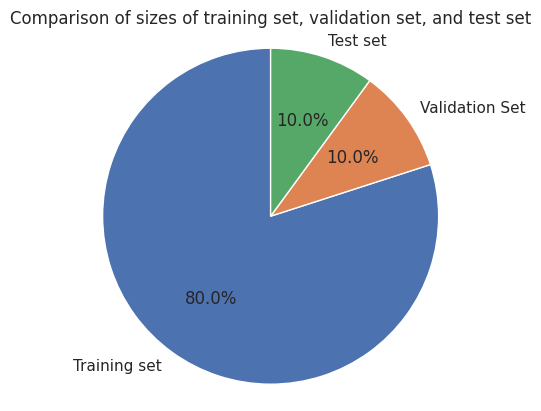

In [ ]:
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title("Comparison of sizes of training set, validation set, and test set")
ax.axis('equal')
plt.show()

In [ ]:
regexp = RegexpTokenizer("[\w']+")


In [ ]:
def to_lowercase(text):
    return text.lower()

In [ ]:
def remove_whitespace(text):
    return text.strip()

In [ ]:
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    return text.translate(str.maketrans("","", punct_str))

In [ ]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_special(text):
    pattern = re.compile(r"\\u00AE|\\u00a9|\\u2122")
    return pattern.sub(r'', text)


def remove_http(text):
    text = re.sub(r'https\S+', '', text)
    return text

In [ ]:
def decontraction(phrase):
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"&", "and", phrase)
    return phrase


def remove_escape_sequences(text):
    text=text.replace(r"\n","")
    text=text.replace(r"\t","")
    text=text.replace(r"\r","")
    return text

In [ ]:
nltk.download('stopwords')
stops = stopwords.words("english")
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops
print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])


In [ ]:
from textblob import TextBlob
def spellcheck(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        correct_spell = str(TextBlob(word).correct())
        word_list_corrected.append(correct_spell)

    text_corrected = " ".join(word_list_corrected)
    return text_corrected

In [ ]:
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    return text_spacy

In [ ]:
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

In [ ]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    token_tagged = nltk.pos_tag(tokens)
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS',
                 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']

    keep_words = [x[0] for x in token_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

In [ ]:
def text_normalizer(text):
    text = to_lowercase(text)
    text = remove_whitespace(text)
    text = remove_punctuation(text)

    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = decontraction(text)
    text = remove_stopwords(text)
#    text = text_lemmatizer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    return text

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
nltk.download('averaged_perceptron_tagger')
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
data_train_norm['normalized Pattern String'] = data_train['Pattern String'].progress_apply(lambda x: text_normalizer(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


  0%|          | 0/1194 [00:00<?, ?it/s]

In [ ]:
data_val_norm['normalized Pattern String'] = data_val['Pattern String'].progress_apply(text_normalizer)
data_test_norm['normalized Pattern String'] = data_test['Pattern String'].progress_apply(text_normalizer)

data_train_norm['Pattern Category'] = data_train['Pattern Category']
data_val_norm['Pattern Category'] = data_val['Pattern Category']
data_test_norm['Pattern Category'] = data_test['Pattern Category']

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
data_train_norm


,normalized Pattern String,Pattern Category
465,feel,Misdirection
1228,stock,Scarcity
1328,stock,Scarcity
1145,left,Scarcity
425,thanks want save,Misdirection
...,...,...
763,time,Urgency
835,availability stock today,Scarcity
1216,item left,Scarcity
559,order reserved minutes,Urgency


In [ ]:
X_train_norm, y_train = data_train_norm["normalized Pattern String"].tolist(), data_train_norm["Pattern Category"].tolist()
X_val_norm, y_val = data_val_norm["normalized Pattern String"].tolist(), data_val_norm["Pattern Category"].tolist()
X_test_norm, y_test = data_test_norm["normalized Pattern String"].tolist(), data_test_norm["Pattern Category"].tolist()

In [ ]:
TfidfVec = TfidfVectorizer(ngram_range = (1,1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

In [ ]:
svm_classifier = svm.SVC()
params_svm = {
    'kernel':['linear'],
    'C': [0.1, 1, 10, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=params_svm, cv=5)

grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Best Score: 0.9304806441405014


In [ ]:
best_model.fit(X_train_tfidf, y_train)


SVC(C=1, kernel='linear')

In [ ]:
model, X_train_vec, X_test_vec = best_model, X_train_tfidf, X_test_tfidf

model.fit(X_train_vec, y_train)
y_test_pred = model.predict(X_test_vec)
score_test = accuracy_score(y_test, y_test_pred)

print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")


Test accuracy    0.96
 


In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

Misdirection       0.86      0.90      0.88        21
 Obstruction       0.83      1.00      0.91         5
    Scarcity       0.97      0.98      0.98        65
Social Proof       1.00      1.00      1.00        37
     Urgency       1.00      0.86      0.93        22

    accuracy                           0.96       150
   macro avg       0.93      0.95      0.94       150
weighted avg       0.96      0.96      0.96       150



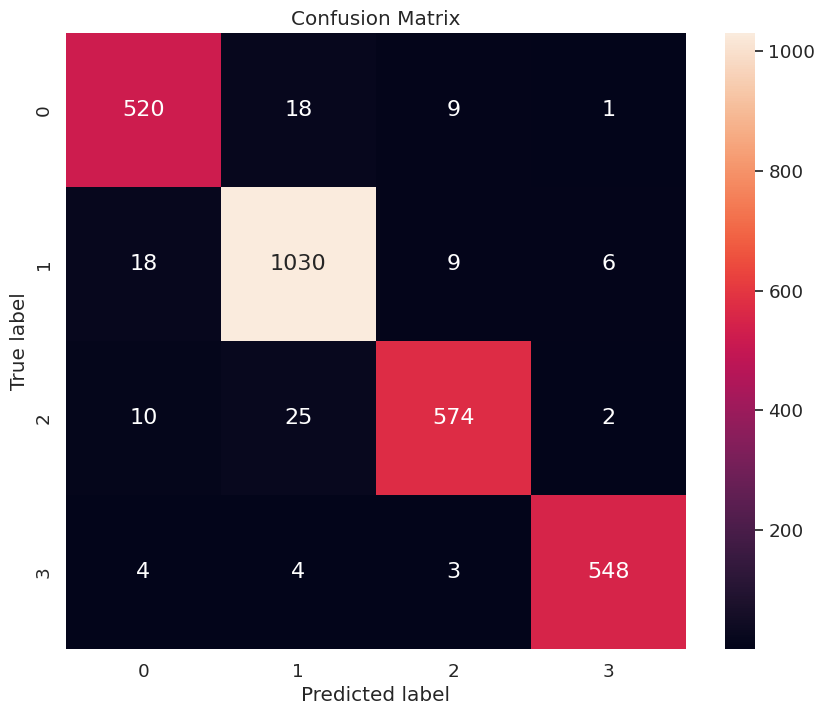

In [ ]:
conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16)

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(TfidfVec, file)


with open('tfidf_vectorizer.pkl', 'rb') as file:
        TfidfVec = pickle.load(file)

Test custom inputs

In [ ]:
def predict_custom(inp):
    df = pd.DataFrame([inp], columns = ['text'])
    test_1 = df['text'].apply(text_normalizer).tolist()
    test_tfidf = TfidfVec.transform(test_1)
    prediction = model.predict(test_tfidf)
    prediction = prediction[0]

    interpretations = {
        2 : "Books",
        3 : "Clothing and Accessories",
        0 : "Electronics",
        1 : "Household"
    }
    for i in interpretations.keys():
        if i == prediction:
            z =  interpretations[i]
    return z

In [ ]:
inp1 = "A Dance with Dragons: A Song of Ice and Fire: Book Five Review “Filled with vividly rendered set pieces, unexpected turnings, assorted cliffhangers and moments of appalling cruelty, A Dance with Dragons is epic fantasy as it should be written: passionate, compelling, convincingly detailed and thoroughly imagined.”—The Washington Post   “Long live George Martin . . . a literary dervish, enthralled by complicated characters and vivid language, and bursting with the wild vision of the very best tale tellers.”—The New York Times   “One of the best series in the history of fantasy.”—Los Angeles Times  About the Author George R.R. Martin sold his first story in 1971 and has been writing professionally since then. He spent ten years in Hollywood as a writer-producer, working on The Twilight Zone, Beauty and the Beast, and various feature films and television pilots that were never made. In the mid '90s he returned to prose, his first love, and began work on his epic fantasy series, A Song of Ice and Fire. He has been in the Seven Kingdoms ever since. Whenever he's allowed to leave, he returns to Santa Fe, New Mexico, where he lives with the lovely Parris, a big white dog called Mischa, and two cats named Augustus and Caligula, who think they run the place. 				    	 					              See all Product description"
print("prediction inp1: ", predict_custom(inp1))

prediction inp1:  Books


In [ ]:
inp6 = '''Dinnerware set for every day use, indoors or out; ideal for any kitchen
Includes a 16-piece set with 4 dinner plates, 4 salad/dessert plates, 4 bowls, and 4 coffee/tea mugs; service for 4
Made of lightweight yet durable BPA-free AB-grade porcelain with a white finish
Dishwasher-safe, freezer-safe, and microwave-safe; plates can withstand heat up to 572 degrees F
Product dimensions: 10.5 inches (W, dinner plate), 7.5 inches (W, salad plate), 5.5 x 2.8 inches (WxH, bowl), and 4 inches (H, mug)'''
print("prediction inp6: ", predict_custom(inp6))

prediction inp6:  Household


In [ ]:
# Household
inp2 = "KEZRO Men's Wallet (Brown)"
print("prediction inp2: ", predict_custom(inp2))

prediction inp2:  Household


In [ ]:
# Clothing and accessories
inp3= "Mushkiya ABD-026 C-Cut Double Layer Abaya burkha for women girl About Mushkiya Mushkiya is an international islamic clothing brand that represents style and modest clothing since 2006. Founded in Dubai , Mushkiya works on a basis of creativity and responsibility, fused with a modesty of islamic clothing.Fashion with modesty are at the heart of the brand’s philosophy. Product Description Simple yet trendy Abaya Dress in double layer and frills on shoulders would become your favourite in no time. This whimsical 'C-Cut' Abaya Dress Is made of Nida-Matt fabric which is soft, breathable and has a great fall. Pinping on the front layer, enhances the look of the Abaya. This Abaya can also be used as a Dress or a Burqa if you prefer colorful ones."
print("prediction inp3: ", predict_custom(inp3))

prediction inp3:  Clothing and Accessories


In [ ]:
# Electronics
inp4 = "Sony DVD Printable Blanks with White Surface -Jar Pack of 100 This product is a must have for many around the world. As it gives it's users the experience they truly desire for."
print("prediction inp4: ", predict_custom(inp4))

prediction inp4:  Electronics


In [ ]:
inp5 = "SAF 'Floral Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Pai..."
print("prediction inp5: ", predict_custom(inp5))

prediction inp5:  Household
